In [66]:
# Data extracted 6 October 2021
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Define Chromium as used browser
driver = webdriver.Chrome("/usr/lib/chromium-browser/chromedriver")

In [3]:
# Loop to loop through all pages
# Scrape first the number of pages (in progress)
url_list=[]
for p in range(1,45): #45
    url_01 = "https://asunnot.oikotie.fi/myytavat-asunnot?pagination="
    url_02 = str(p)
    url_03 = "&locations=%5B%22helsinki%22%5D&roomCount%5B%5D=2&cardType=100"        
    url_list.append(url_01 + url_02 + url_03)

In [11]:
# Define lists that will house the scraped results
addresses=[]
districts=[]
cities=[]
prices=[]
sizes=[]
years=[]
descriptions=[]

In [5]:
# Loop through each url and save information into lists
for i in url_list[0:44]:
    url = i
    driver.get(url)
    time.sleep(3)
    content = driver.page_source
    soup = BeautifulSoup(content)
    while True:
        try:
            for a in soup.findAll('div',href=False, attrs={'class':'cards__card'}):
                address=a.find('div', attrs={'class':'ot-card__street'})
                district=a.find('span', attrs={'class':'ot-card__text'})
                city=a.find('span', attrs={'class':'ot-card__text ot-card__text--concat ng-binding ng-scope'})
                price=a.find('span', attrs={'class':'ot-card__price'})
                size=a.find('span', attrs={'class':'ot-card__size'})
                description=a.find('section', attrs={'class':'ot-card__section ng-scope'})
                print(address)
                addresses.append(address.text)
                districts.append(district.text)
                cities.append(city.text)
                prices.append(price.text)
                sizes.append(size.text)
                descriptions.append(description.text)
        except AttributeError:
            break


<div class="ot-card__street ng-binding" ng-bind="$ctrl.card.building.address">Torkkelinkatu 2 b A</div>
<div class="ot-card__street ng-binding" ng-bind="$ctrl.card.building.address">Vanhaistentie 5 E</div>
<div class="ot-card__street ng-binding" ng-bind="$ctrl.card.building.address">Kaupinmäenpolku 9</div>
<div class="ot-card__street ng-binding" ng-bind="$ctrl.card.building.address">Päivöläntie 24</div>
<div class="ot-card__street ng-binding" ng-bind="$ctrl.card.building.address">Ulvilantie 19 c</div>
<div class="ot-card__street ng-binding" ng-bind="$ctrl.card.building.address">Renginpolku 8</div>
<div class="ot-card__street ng-binding" ng-bind="$ctrl.card.building.address">Solnantie 26</div>
<div class="ot-card__street ng-binding" ng-bind="$ctrl.card.building.address">Kivikonkaari 5 A</div>
<div class="ot-card__street ng-binding" ng-bind="$ctrl.card.building.address">Lauttasaarentie 34 B 20</div>
<div class="ot-card__street ng-binding" ng-bind="$ctrl.card.building.address">Viipurinkat

KeyboardInterrupt: 

In [ ]:
# Write list contents to a csv file
df = pd.DataFrame({'Address':addresses, 'District':districts, 'City':cities, 'Size':sizes, 'Price':prices, 'Description':descriptions})
df.to_csv('Apartments_07.csv', index=False, encoding='utf-8')

In [12]:
# Read prescraped csv
df = pd.read_csv('Apartments.csv')

In [13]:
df.head()
#df.tail()

,Address,District,City,Size,Price,Description
0,Kotinummenkuja 2 D 13,Tapanila,Helsinki,58 m²,199 000 €,\n2h+k+kph+ter+piha\n
1,Thomas Byströmin kuja 2 C,Jätkäsaari,Helsinki,65 m²,555 000 €,\n2h+kt+s+2x las.parveke\n
2,Kolmas linja 5 A,Kallio,Helsinki,55 m²,304 000 €,\n2-3h+k+kph+vh\n
3,Raaseporintie 1 C,Puotinharju,Helsinki,46 m²,189 000 €,\n2h+k+kph+vh+parveke\n
4,Maurinkatu 14 D,Kruununhaka,Helsinki,"45,5 m²",340 000 €,\n2h + k+kph/wc+2 vh\n


In [14]:
df['District'] = df['District'].str.strip()

In [15]:
split_01 = ' '
df['Size'] = df['Size'].str.split(split_01).str[0]
df['Size'] = df['Size'].str.replace(',', '.')
print(df['Size'])

split_02 = '€'
df['Price'] = df['Price'].str.split(split_02).str[0]
df['Price'] = df['Price'].str.strip()
df['Price'] = df['Price'].str.replace('\xa0','')
print(df['Price'])


0         58
1         65
2         55
3         46
4       45.5
        ... 
1008      52
1009      62
1010    67.5
1011      45
1012      45
Name: Size, Length: 1013, dtype: object
0       199000
1       555000
2       304000
3       189000
4       340000
         ...  
1008    417420
1009    697183
1010    414760
1011    414500
1012    414500
Name: Price, Length: 1013, dtype: object


In [16]:
df = df.astype({'Size': float, 'Price': int})

In [18]:
# Laske neliöhinta sarakkeeseen
df['SqmPrice'] = df['Price']/df['Size']

In [19]:
# Kallio
kallio_sub = df[df['District'] == 'Kallio']
kallio_sub = kallio_sub.sort_values('SqmPrice')
kallio_sub

,Address,District,City,Size,Price,Description,SqmPrice
507,Kolmas linja 5 A,Kallio,Helsinki,55.0,279000,"\n2h,avokeittiö,kph\n",5072.727273
2,Kolmas linja 5 A,Kallio,Helsinki,55.0,304000,\n2-3h+k+kph+vh\n,5527.272727
460,Kirstinkatu 9 B,Kallio,Helsinki,52.0,308000,\n2h+k+kph\n,5923.076923
585,Helsinginkatu 8,Kallio,Helsinki,58.0,345000,\n2h + avokeittiö + kph + alkovi\n,5948.275862
610,Alppikatu 13 B,Kallio,Helsinki,56.5,344000,\n2h+k\n,6088.495575
536,Suonionkatu 1 B,Kallio,Helsinki,44.0,275000,"\n2h, avok, kph/wc\n",6250.000000
26,Vaasankatu 18 B,Kallio,Helsinki,50.5,320000,"\n2h, k, kph, lasitettu parveke\n",6336.633663
568,Neljäs linja 16,Kallio,Helsinki,54.0,344000,\n2h+k+kph+vh+p\n,6370.370370
269,Itäinen Alppirinne 1A D,Kallio,Helsinki,52.5,335000,\n2h + avokeittiö (yhtiöjärjestyksen mukaan1h+...,6380.952381
685,Toinen linja 15 B,Kallio,Helsinki,40.5,270000,\n2h+kk\n,6666.666667


In [20]:
# Keskineliöhinnat
neliohinnat_hki = df['Price']/df['Size']
keskineliohinta_hki = np.mean(neliohinnat_hki)
print("Keskineliöhinta, Helsinki: ", np.round(keskineliohinta_hki,0))
neliohinnat_kallio = df.loc[df['District'] == 'Kallio', 'Price']/df.loc[df['District'] == 'Kallio', 'Size']
keskineliohinta_kallio = np.mean(neliohinnat_kallio)
print("Keskineliöhinta, Kallio: ", np.round(keskineliohinta_kallio,0))

Keskineliöhinta, Helsinki:  6325.0
Keskineliöhinta, Kallio:  7075.0


In [21]:
# Asunnot, jotka alle keskineliohinnan
# Pivot asunnoista ja niiden neliöhinnoista
# 1 jos alle, 0 jos yli
SqmPrice_pivot = df.pivot_table(index = ['District'], values = ['SqmPrice'], aggfunc = np.mean)
SqmPrice_pivot = SqmPrice_pivot.rename(columns={'SqmPrice': 'SqmPrice_mean'})
SqmPrice_pivot = SqmPrice_pivot.reset_index()
SqmPrice_pivot

,District,SqmPrice_mean
0,Alppiharju,6284.825014
1,Alppikylä,3863.230769
2,Alppila,6985.103098
3,Arabianranta,7062.749860
4,Aurinkolahti,5977.440376
...,...,...
111,Viikinmäki,6208.080808
112,Viikinranta,6842.105263
113,Viikki,3043.207252
114,Vuosaari,5068.270698


In [28]:
SqmPrice_pivot.loc[SqmPrice_pivot['District'] == 'Kallio'] 

,District,SqmPrice_mean
26,Kallio,7074.598228


In [29]:
sorted_data = df
sorted_data = sorted_data.merge(SqmPrice_pivot, left_on = 'District', right_on = 'District')
sorted_data = sorted_data.sort_values('SqmPrice_mean')
print(sorted_data)

                      Address                District      City  Size  \
1005   Messipojankuja 12 B 45              Ruoholahti  Helsinki  48.0   
817    Paciuksenkaari 12 A 05              Huopalahti  Helsinki  46.5   
818    Paciuksenkaari 12 B 31              Huopalahti  Helsinki  56.5   
994      Kirjokiventie 1 ja 2              Maununneva  Helsinki  51.0   
907      Muinaisrannantie 3 D                 Kivikko  Helsinki  53.0   
...                       ...                     ...       ...   ...   
398         Merimiehenkatu 10               Punavuori  Helsinki  63.0   
470        Uudenmaankatu 13 B      Punavuori / Kamppi  Helsinki  70.6   
971      Kalliolinnantie 10 B             Kaivopuisto  Helsinki  75.0   
1012  Purjeentekijänkuja 11 A  Lauttasaari Vattuniemi  Helsinki  50.0   
941              Eiranranta 7              Eiranranta  Helsinki  84.0   

        Price                                        Description  \
1005    14485                                        \n

In [ ]:
# Kaupunginosat
# Neljä väriä peruspiirien mukaan (etelä, itä, länsi, pohjoinen)

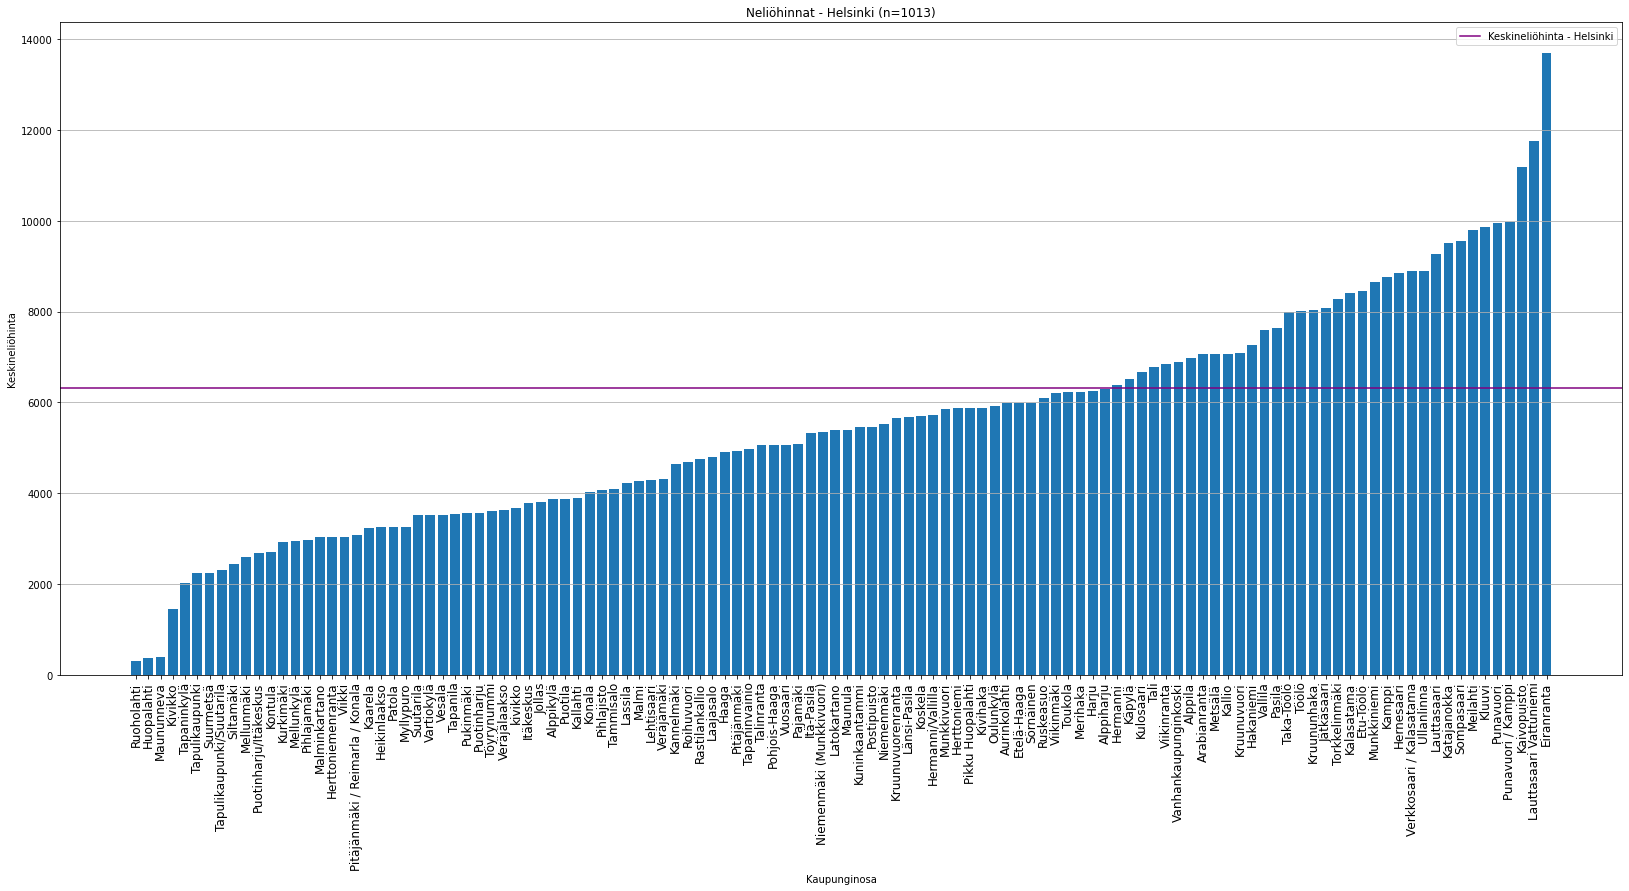

In [171]:
plt.bar('District', 'SqmPrice_mean', data = sorted_data)
plt.axhline(keskineliohinta_hki, color='purple', label = 'Keskineliöhinta - Helsinki')
plt.xlabel('Kaupunginosa')
plt.xticks(fontsize = 12, rotation = 90)
plt.ylabel('Keskineliöhinta')
plt.title('Neliöhinnat - Helsinki (n=1013)')
plt.legend()
plt.grid(axis='y')
figure = plt.gcf()
figure.set_size_inches(28,12)
#plt.savefig('Jee.jpg', dpi = 100, bbox_inches = 'tight')

In [47]:
plt.close()

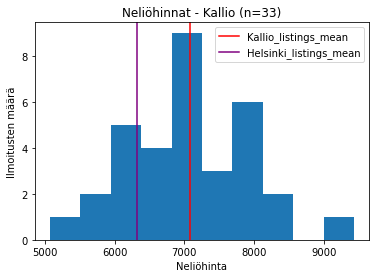

In [169]:
plt.hist(neliohinnat_kallio, bins = 10)
plt.axvline(keskineliohinta_kallio, color='red', label = 'Kallio_listings_mean')
plt.axvline(keskineliohinta_hki, color='purple', label = 'Helsinki_listings_mean')
plt.xlabel('Neliöhinta')
plt.ylabel('Ilmoitusten määrä')
plt.title('Neliöhinnat - Kallio (n=33)')
plt.legend()
plt.show()
#keskineliohinta_kallio

In [52]:
plt.close()

In [192]:
# Let's see how many apartments are listed per district
n_pivot = df.pivot_table(index = 'District', values = 'Address', aggfunc = 'count')
n_pivot = n_pivot.reset_index()
n_pivot = n_pivot.sort_values('Address', ascending=False)
n_pivot = n_pivot.rename(columns={'Address': 'Count'})
n_pivot

,District,Count
46,Lauttasaari,60
114,Vuosaari,52
54,Meilahti,49
66,Pasila,44
28,Kannelmäki,40
...,...,...
72,Pitäjänmäki / Reimarla / Konala,1
83,Ruoholahti,1
77,Punavuori / Kamppi,1
81,Rastilankallio,1


''

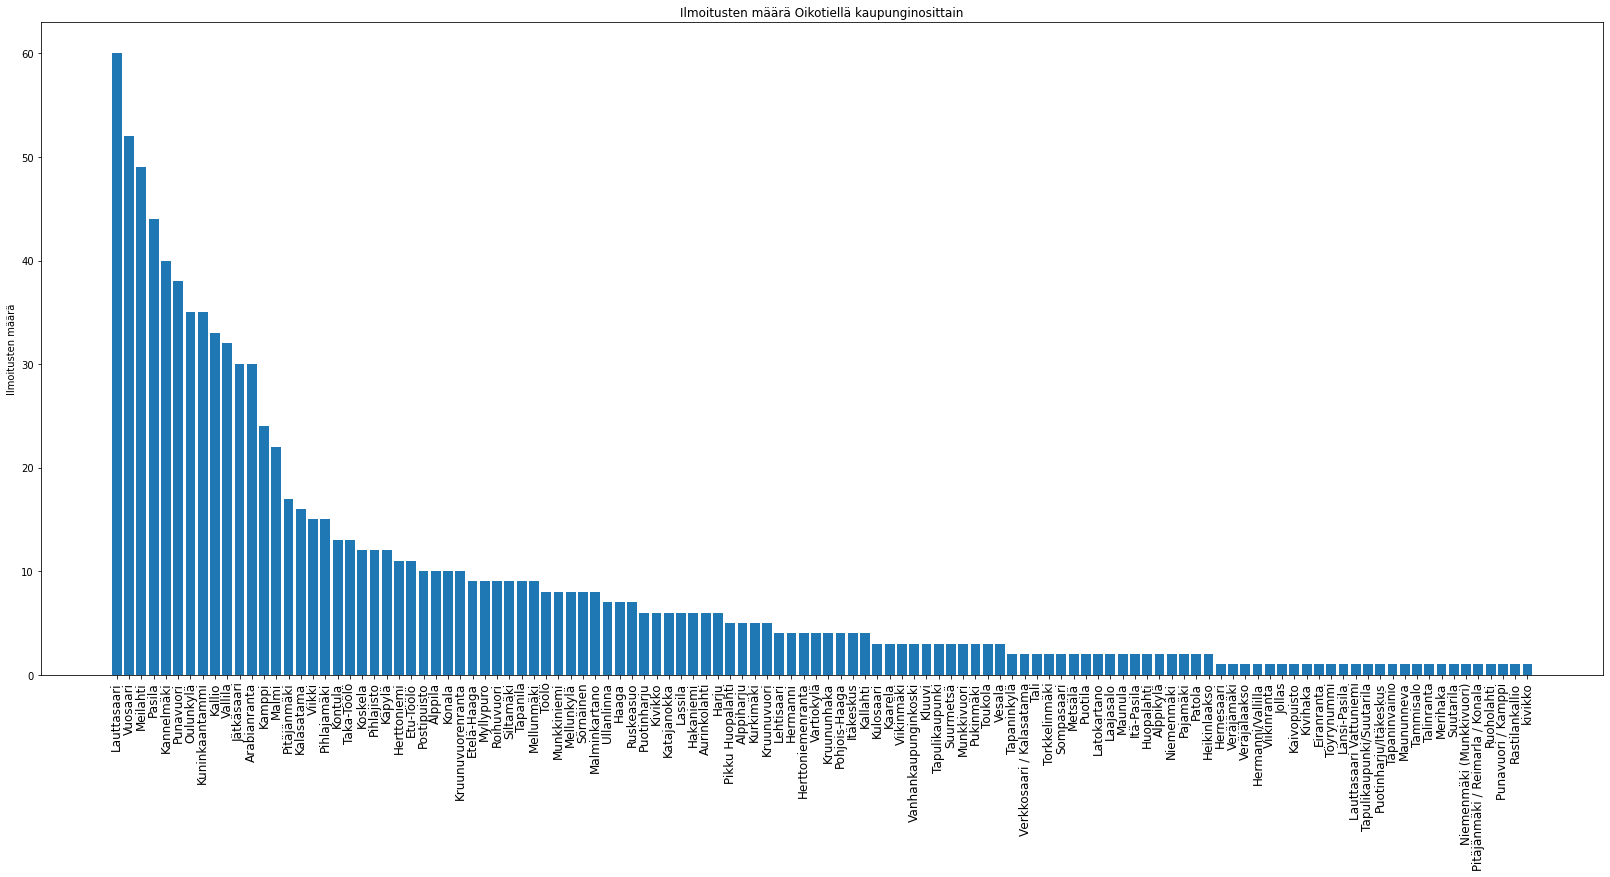

In [213]:
plt.bar('District', 'Count' , data = n_pivot)
plt.xticks(fontsize = 12, rotation = 90)
plt.ylabel('Ilmoitusten määrä')
plt.title('Ilmoitusten määrä Oikotiellä kaupunginosittain')
figure = plt.gcf()
figure.set_size_inches(28,12)
#plt.savefig('Jee_04.jpg', dpi = 100, bbox_inches = 'tight')
;

In [ ]:
# Hintapyyntijakauma - Helsinki
# Järjestä vierekkäin 1X2-matriisiin
plt.hist()

plt.boxplot()

In [53]:
# Read in the sqm data on realized sales (Q2/2021)
sqm_data = pd.read_csv('Sqm_prices.csv')
sqm_data = sqm_data.rename(columns = {'SqmPrice': 'SqmPrice_real'})
sqm_data

,District,SqmPrice_real
0,Kaartinkaupunki,9986
1,Kaivopuisto,9633
2,Eira,9197
3,Punavuori,8856
4,Ruoholahti,8449
...,...,...
73,Puistola,2800
74,Siltamäki,2658
75,Kontula,2601
76,Mellunkylä,2512


In [54]:
sorted_data_02 = sorted_data.merge(sqm_data, on = 'District')
sorted_data_02

,Address,District,City,Size,Price,Description,SqmPrice,SqmPrice_mean,SqmPrice_real
0,Messipojankuja 12 B 45,Ruoholahti,Helsinki,48.0,14485,\n2H+KK+S\n,301.770833,301.770833,8449
1,Kirjokiventie 1 ja 2,Maununneva,Helsinki,51.0,19954,\n2H+K+S\n,391.254902,391.254902,3994
2,Mätästie 3 L,Suurmetsä,Helsinki,61.0,146000,"\n2h,k,kph,lasitettu parveke\n",2393.442623,2246.206921,3121
3,Mätästie 5 L 237,Suurmetsä,Helsinki,63.5,128800,\n2h+k+kph+s+las.parv\n,2028.346457,2246.206921,3121
4,Mätästie 5 B,Suurmetsä,Helsinki,50.5,117000,"\n2h,k,kph,p\n",2316.831683,2246.206921,3121
...,...,...,...,...,...,...,...,...,...
510,Iso Roobertinkatu 46 B,Punavuori,Helsinki,40.5,359000,"\n2h,avok,kph\n",8864.197531,9954.082781,8856
511,Punavuorenkatu 21 C,Punavuori,Helsinki,60.0,445000,"\n2 h, keittiö, kph/wc, lasitettu parveke \n",7416.666667,9954.082781,8856
512,Hietalahdenranta 2 A 22,Punavuori,Helsinki,62.5,688200,\n2H+KT+S+VIHERH.\n,11011.200000,9954.082781,8856
513,Merimiehenkatu 10,Punavuori,Helsinki,63.0,573000,"\n2h, k, kph\n",9095.238095,9954.082781,8856


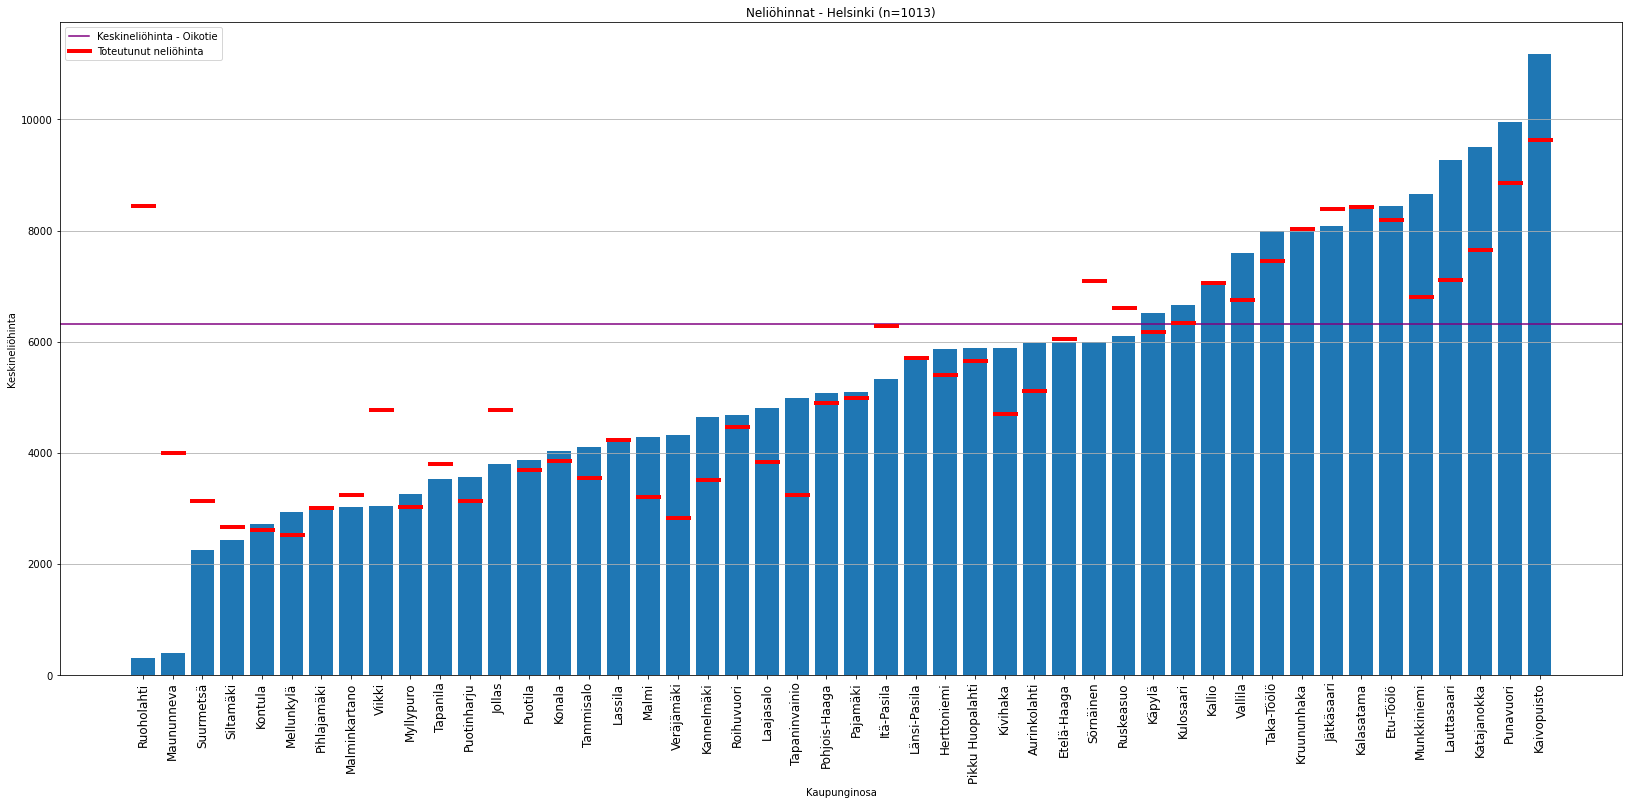

In [164]:
plt.bar('District', 'SqmPrice_mean', data = sorted_data_02)
plt.axhline(keskineliohinta_hki, color='purple', label = 'Keskineliöhinta - Oikotie')
#plt.axhline(y=sorted_data_02['SqmPrice_real'], color='b', linestyle=':', label='red line')
plt.plot(pd.unique(sorted_data_02['SqmPrice_real']), '_' , color = 'red', mew = 4, ms = '25', label = 'Toteutunut neliöhinta')
plt.xlabel('Kaupunginosa')
plt.xticks(fontsize = 12, rotation = 90)
plt.ylabel('Keskineliöhinta')
plt.title('Neliöhinnat - Helsinki (n=1013)')
plt.legend()
plt.grid(axis='y')
figure = plt.gcf()
figure.set_size_inches(28,12)
#plt.savefig('Jee_02.jpg', dpi = 100, bbox_inches = 'tight')

In [165]:
plt.close()

In [133]:
sorted_kallio = sorted_data_02[sorted_data_02['District'] == 'Kallio']
sorted_kallio = sorted_kallio.sort_values('SqmPrice')
sorted_kallio.loc[sorted_kallio['Address'] == 'Viides linja 2 B', 'Address'] = ['Viides linja 2 B 1', 'Viides linja 2 B 2']
sorted_kallio

,Address,District,City,Size,Price,Description,SqmPrice,SqmPrice_mean,SqmPrice_real
272,Kolmas linja 5 A,Kallio,Helsinki,55.0,279000,"\n2h,avokeittiö,kph\n",5072.727273,7074.598228,7051
287,Kolmas linja 5 A,Kallio,Helsinki,55.0,304000,\n2-3h+k+kph+vh\n,5527.272727,7074.598228,7051
280,Kirstinkatu 9 B,Kallio,Helsinki,52.0,308000,\n2h+k+kph\n,5923.076923,7074.598228,7051
269,Helsinginkatu 8,Kallio,Helsinki,58.0,345000,\n2h + avokeittiö + kph + alkovi\n,5948.275862,7074.598228,7051
264,Alppikatu 13 B,Kallio,Helsinki,56.5,344000,\n2h+k\n,6088.495575,7074.598228,7051
271,Suonionkatu 1 B,Kallio,Helsinki,44.0,275000,"\n2h, avok, kph/wc\n",6250.000000,7074.598228,7051
289,Vaasankatu 18 B,Kallio,Helsinki,50.5,320000,"\n2h, k, kph, lasitettu parveke\n",6336.633663,7074.598228,7051
270,Neljäs linja 16,Kallio,Helsinki,54.0,344000,\n2h+k+kph+vh+p\n,6370.370370,7074.598228,7051
278,Itäinen Alppirinne 1A D,Kallio,Helsinki,52.5,335000,\n2h + avokeittiö (yhtiöjärjestyksen mukaan1h+...,6380.952381,7074.598228,7051
263,Toinen linja 15 B,Kallio,Helsinki,40.5,270000,\n2h+kk\n,6666.666667,7074.598228,7051


''

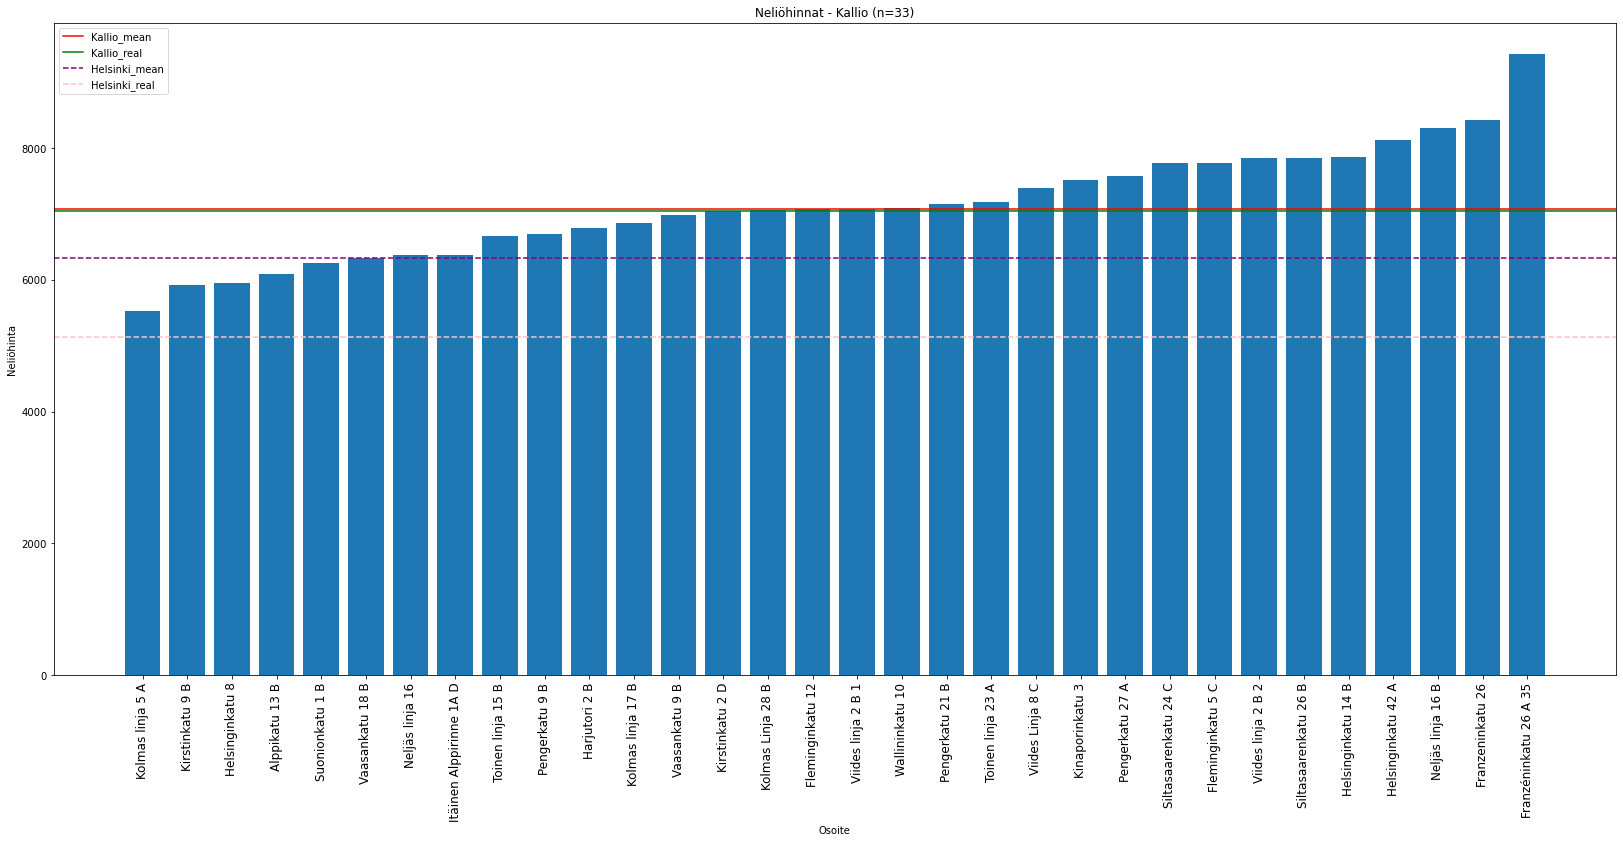

In [163]:
kallio_sqm_real = sorted_kallio['SqmPrice_real']
hki_sqm_real = np.mean(sqm_data['SqmPrice_real'])

plt.bar('Address','SqmPrice', data = sorted_kallio)
plt.xticks(fontsize = 12, rotation = 90)
plt.axhline(keskineliohinta_kallio, color='red', label = 'Kallio_listings')
plt.axhline(kallio_sqm_real.iloc[0], color='green', label = 'Kallio_real')
plt.axhline(keskineliohinta_hki, color='purple', label = 'Helsinki_listings', linestyle = 'dashed')
plt.axhline(hki_sqm_real, color='pink', label = 'Helsinki_real', linestyle = 'dashed')

plt.ylabel('Neliöhinta')
plt.xlabel('Osoite')
plt.title('Neliöhinnat - Kallio (n=33)')
plt.legend()
figure = plt.gcf()
figure.set_size_inches(28,12)
plt.savefig('Jee_03.jpg', dpi = 100, bbox_inches = 'tight')
;